source: https://towardsdatascience.com/house-prices-prediction-using-deep-learning-dea265cc3154
https://medium.com/analytics-vidhya/house-price-prediction-regression-with-tensorflow-keras-4fc49fae7123

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/Harshita9511/House-Price-Prediction-Regression-with-Tensorflow-Keras-/master/housing.csv

--2020-11-15 22:12:46--  https://raw.githubusercontent.com/Harshita9511/House-Price-Prediction-Regression-with-Tensorflow-Keras-/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.09s   

2020-11-15 22:12:46 (15.7 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [ ]:
df=pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df=df.drop('ocean_proximity', axis=1)
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# plt.figure(figsize=(8,4))
# sns.distplot(df['median_house_value'])

In [ ]:
# plt.figure(figsize=(12,8))
# sns.scatterplot(x='median_house_value',y='longitude',data=df)

In [ ]:
# plt.figure(figsize=(12,8))
# sns.scatterplot(x='median_house_value',y='latitude',data=df)

In [ ]:
# plt.figure(figsize=(12,8))
# sns.scatterplot(x='longitude',y='latitude',data=df,hue='median_house_value')

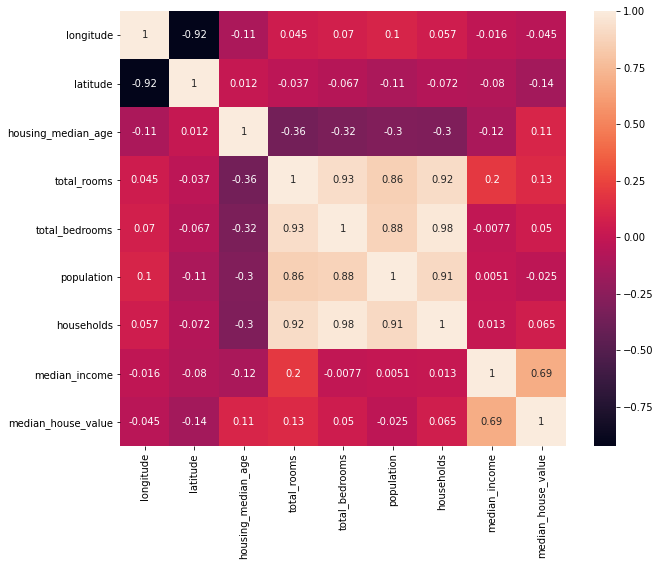

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

### Spliting into Train and Test set

In [ ]:
X = df.drop('median_house_value',axis=1)
y = df['median_house_value']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Normalizing data into range (0,1)
source: https://arshpreetsingh.wordpress.com/2017/03/09/preprocessing-your-data-and-why/
<br>
$$x_{new}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[:3]

array([[0.25809717, 0.50797024, 0.25490196, 0.11216237, 0.14323402,
        0.07553463, 0.14635751, 0.28984428],
       [0.47773279, 0.4357067 , 0.62745098, 0.02629839, 0.02793296,
        0.01729309, 0.02844927, 0.20074206],
       [0.63663968, 0.16790648, 0.47058824, 0.09891144, 0.1314401 ,
        0.05171109, 0.12465055, 0.21820389]])

In [ ]:
X_train.shape, y_train.shape

((16346, 8), (16346,))

### Creating 2 layers neuron network model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

![](https://drive.google.com/uc?export=view&id=10gljfr8TjV00ASNwOrqb69cf0MZpRIcM)

#### **Activation Function**
more: https://www.youtube.com/watch?v=m0pIlLfpXWE
![](https://cdn-images-1.medium.com/freeze/max/1000/1*4ZEDRpFuCIpUjNgjDdT2Lg.png?q=20)

#### **Adam optimizer**
Adam uses Momentum and Adaptive Learning Rates to converge faster. (more: https://mlfromscratch.com/optimizers-explained/#/)
![](https://miro.medium.com/max/1200/1*U224pqhF4WUOZhfmDIWtxA.gif)

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test,y_test.values),
          batch_size=32,
          epochs=100)

Epoch 1/100
511/511 [==============================] - 1s 1ms/step - loss: 55936929792.0000 - val_loss: 56827301888.0000
Epoch 2/100
511/511 [==============================] - 1s 1ms/step - loss: 55926607872.0000 - val_loss: 56812523520.0000
Epoch 3/100
511/511 [==============================] - 1s 1ms/step - loss: 55908126720.0000 - val_loss: 56790224896.0000
Epoch 4/100
511/511 [==============================] - 1s 994us/step - loss: 55882719232.0000 - val_loss: 56761397248.0000
Epoch 5/100
511/511 [==============================] - 1s 1ms/step - loss: 55851159552.0000 - val_loss: 56726740992.0000
Epoch 6/100
511/511 [==============================] - 1s 992us/step - loss: 55814209536.0000 - val_loss: 56686829568.0000
Epoch 7/100
511/511 [==============================] - 1s 1ms/step - loss: 55772196864.0000 - val_loss: 56642064384.0000
Epoch 8/100
511/511 [==============================] - 1s 991us/step - loss: 55725445120.0000 - val_loss: 56592576512.0000
Epoch 9/100
511/511 [=====

In [ ]:
import keras.backend as K
print(K.eval(model.optimizer.lr))

0.001


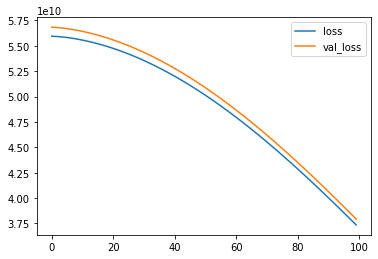

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### Creating Multi-layer neural network model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

### Training the model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Stop training before last epoch if found the validation loss is minimum
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400, callbacks=[early_stop])

Epoch 1/400
128/128 [==============================] - 0s 2ms/step - loss: 55934664704.0000 - val_loss: 56809664512.0000
Epoch 2/400
128/128 [==============================] - 0s 2ms/step - loss: 55674777600.0000 - val_loss: 55962656768.0000
Epoch 3/400
128/128 [==============================] - 0s 2ms/step - loss: 52717641728.0000 - val_loss: 49466445824.0000
Epoch 4/400
128/128 [==============================] - 0s 2ms/step - loss: 40326340608.0000 - val_loss: 30512949248.0000
Epoch 5/400
128/128 [==============================] - 0s 1ms/step - loss: 20285181952.0000 - val_loss: 14000756736.0000
Epoch 6/400
128/128 [==============================] - 0s 2ms/step - loss: 12320353280.0000 - val_loss: 12326946816.0000
Epoch 7/400
128/128 [==============================] - 0s 2ms/step - loss: 11864169472.0000 - val_loss: 12186173440.0000
Epoch 8/400
128/128 [==============================] - 0s 2ms/step - loss: 11733564416.0000 - val_loss: 12050708480.0000
Epoch 9/400
128/128 [===========

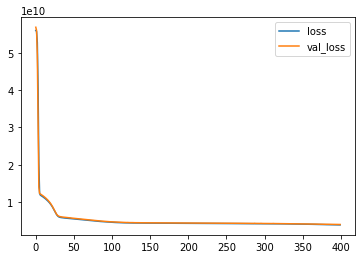

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

predictions = model.predict(X_test)

In [ ]:
 print("Mean Absolute Error: ", mean_absolute_error(y_test,predictions), 
      "\nRoot Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predictions)))

Mean Absolute Error:  44448.023016003484 
Root Mean Squared Error:  63373.40810575156


### Testing new sample

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [ ]:
X_sample = [[-122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 126.0, 8.3252]]
X_sample = scaler.transform(X_sample)

In [ ]:
sample_prediction = model.predict(X_sample)
sample_prediction

array([[432382.06]], dtype=float32)